<a href="https://colab.research.google.com/github/taxuyou/library-recommend/blob/master/ARIMA_%EB%B6%84%EC%84%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
from pandas import Series
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import seaborn as sns
from scipy import stats

# 노트북 안에 그래프를 그리기 위해
%matplotlib inline

# 그래프에서 격자로 숫자 범위가 눈에 잘 띄도록 ggplot 스타일을 사용
plt.style.use('ggplot')

# 그래프에서 마이너스 폰트 깨지는 문제에 대한 대처
mpl.rcParams['axes.unicode_minus'] = False

In [0]:
series = pd.read_csv('대출과날씨데이터1.csv',header=0, 
                     parse_dates=["date"])

In [3]:
series.shape

(10942, 5)

In [0]:
series['date']=series['date'].astype(str)

In [6]:
###   date를 받아와서 휴일, 일하는 날 구하기 
import datetime
def getDayName(a,b,c):
   
  return ['MON','TUE','WED','THU','FRI','SAT','SUN'][datetime.date(int(a),int(b),int(c)).weekday()]

# 리스트로 저장 -> DataFrame으로 변환순으로 가면되여
# 빈리스트 선언
list1 = []
for i in series['date']:
    a = i[0:4]
    b = i[5:7]
    c = i[11:13]
    # print(getDayName(a,b,c))
    # 리스트에 추가
    list1.append(getDayName(a,b,c))

# 리스트 -> DataFrame으로 전환    
series['days'] = list1
series

,date,c,mm,h,loan,days
0,2017-01-01 09:00:00,-1.1,0.0,97.9,55,MON
1,2017-01-01 10:00:00,-0.5,0.0,97.7,78,TUE
2,2017-01-01 11:00:00,0.6,0.0,97.9,171,WED
3,2017-01-01 12:00:00,2.2,0.0,96.3,203,THU
4,2017-01-01 13:00:00,5.5,0.0,73.2,398,FRI
5,2017-01-01 14:00:00,7.9,0.0,64.3,398,SAT
6,2017-01-01 15:00:00,8.9,0.0,58.6,582,SUN
7,2017-01-01 16:00:00,8.6,0.0,58.2,560,MON
8,2017-01-01 17:00:00,6.7,0.0,66.9,570,TUE
9,2017-01-01 18:00:00,4.4,0.0,73.6,2,WED


In [7]:
list2 = []
for i in series['days']:
  if i == 'MON':
    list2.append(1)
  else:
    list2.append(0)
series["holiday"] = list2
series.head() 

,date,c,mm,h,loan,days,holiday
0,2017-01-01 09:00:00,-1.1,0.0,97.9,55,MON,1
1,2017-01-01 10:00:00,-0.5,0.0,97.7,78,TUE,0
2,2017-01-01 11:00:00,0.6,0.0,97.9,171,WED,0
3,2017-01-01 12:00:00,2.2,0.0,96.3,203,THU,0
4,2017-01-01 13:00:00,5.5,0.0,73.2,398,FRI,0


In [8]:
list3 = []
for i in series['holiday']:
  if i == 0:
    list3.append(1)
  else:
    list3.append(0)

series['workingday'] = list3
series

,date,c,mm,h,loan,days,holiday,workingday
0,2017-01-01 09:00:00,-1.1,0.0,97.9,55,MON,1,0
1,2017-01-01 10:00:00,-0.5,0.0,97.7,78,TUE,0,1
2,2017-01-01 11:00:00,0.6,0.0,97.9,171,WED,0,1
3,2017-01-01 12:00:00,2.2,0.0,96.3,203,THU,0,1
4,2017-01-01 13:00:00,5.5,0.0,73.2,398,FRI,0,1
5,2017-01-01 14:00:00,7.9,0.0,64.3,398,SAT,0,1
6,2017-01-01 15:00:00,8.9,0.0,58.6,582,SUN,0,1
7,2017-01-01 16:00:00,8.6,0.0,58.2,560,MON,1,0
8,2017-01-01 17:00:00,6.7,0.0,66.9,570,TUE,0,1
9,2017-01-01 18:00:00,4.4,0.0,73.6,2,WED,0,1


In [9]:
series.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10942 entries, 0 to 10941
Data columns (total 8 columns):
date          10942 non-null object
c             10942 non-null float64
mm            10942 non-null float64
h             10942 non-null float64
loan          10942 non-null int64
days          10942 non-null object
holiday       10942 non-null int64
workingday    10942 non-null int64
dtypes: float64(3), int64(3), object(2)
memory usage: 684.0+ KB


In [13]:
pd.to_numeric(series['loan'])

0         55
1         78
2        171
3        203
4        398
5        398
6        582
7        560
8        570
9          2
10         1
11        52
12       125
13       285
14       341
15       297
16       356
17       412
18       307
19       330
20       121
21        82
22        61
23         3
24       112
25       172
26       281
27       371
28       470
29       581
        ... 
10912      2
10913      1
10914      5
10915    198
10916    298
10917    476
10918    516
10919    393
10920    423
10921    436
10922    508
10923    407
10924    129
10925     85
10926    125
10927      1
10928      2
10929      5
10930    158
10931    303
10932    414
10933    426
10934    366
10935    398
10936    364
10937    322
10938    439
10939    121
10940    103
10941    142
Name: loan, Length: 10942, dtype: int64

In [0]:
series['date'] = pd.to_datetime(series['date'], errors='coerce')

In [15]:
series["year"] = series["date"].dt.year
series["month"] = series["date"].dt.month
series["day"] = series["date"].dt.day
series["hour"] = series["date"].dt.hour
series["minute"] = series["date"].dt.minute
series["second"] = series["date"].dt.second

series.shape

(10942, 14)

In [16]:
series

,date,c,mm,h,loan,days,holiday,workingday,year,month,day,hour,minute,second
0,2017-01-01 09:00:00,-1.1,0.0,97.9,55,MON,1,0,2017,1,1,9,0,0
1,2017-01-01 10:00:00,-0.5,0.0,97.7,78,TUE,0,1,2017,1,1,10,0,0
2,2017-01-01 11:00:00,0.6,0.0,97.9,171,WED,0,1,2017,1,1,11,0,0
3,2017-01-01 12:00:00,2.2,0.0,96.3,203,THU,0,1,2017,1,1,12,0,0
4,2017-01-01 13:00:00,5.5,0.0,73.2,398,FRI,0,1,2017,1,1,13,0,0
5,2017-01-01 14:00:00,7.9,0.0,64.3,398,SAT,0,1,2017,1,1,14,0,0
6,2017-01-01 15:00:00,8.9,0.0,58.6,582,SUN,0,1,2017,1,1,15,0,0
7,2017-01-01 16:00:00,8.6,0.0,58.2,560,MON,1,0,2017,1,1,16,0,0
8,2017-01-01 17:00:00,6.7,0.0,66.9,570,TUE,0,1,2017,1,1,17,0,0
9,2017-01-01 18:00:00,4.4,0.0,73.6,2,WED,0,1,2017,1,1,18,0,0


In [17]:
series.loan.describe()

count    10942.000000
mean       232.713398
std        208.028655
min          1.000000
25%         82.000000
50%        192.000000
75%        323.000000
max       1268.000000
Name: loan, dtype: float64

In [18]:
# size, family
print('# 설정 되어있는 폰트 사이즈')
print (plt.rcParams['font.size'] ) 
print('# 설정 되어있는 폰트 글꼴')
print (plt.rcParams['font.family'] )

# 설정 되어있는 폰트 사이즈
10.0
# 설정 되어있는 폰트 글꼴
['sans-serif']


In [0]:
# serif, sans-serif, monospace
print('serif 세리프가 있는 폰트--------')
print (plt.rcParams['font.serif']) 
print('sans-serif 세리프가 없는 폰트 --------')
print (plt.rcParams['font.sans-serif']) 
print('monospace 고정폭 글꼴--------')
print (plt.rcParams['font.monospace'])

In [0]:
plt.rcParams["font.family"] = 'Nanum Brush Script OTF'
plt.rcParams["font.size"] = 20
plt.rcParams["figure.figsize"] = (14,4)

In [0]:
font_list = fm.findSystemFonts(fontpaths=None, fontext='ttf')
print(len(font_list))

In [0]:
font_list

[Text(0.5, 0, 'hour'), Text(0.5, 1.0, '시간별 대여량')]

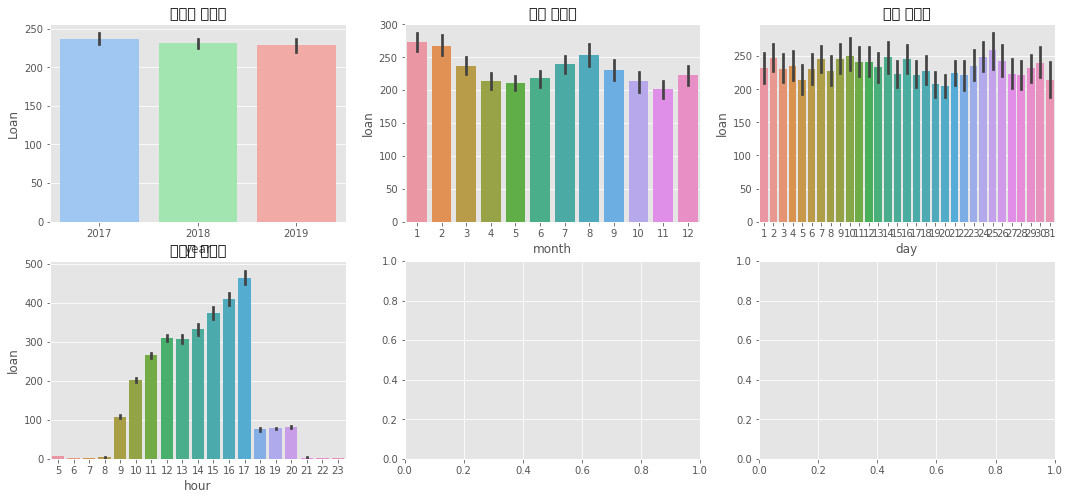

In [19]:
figure, ((ax1,ax2,ax3), (ax4,ax5,ax6)) = plt.subplots(nrows=2, ncols=3)
figure.set_size_inches(18,8)
plt.style.use('seaborn-pastel')
sns.barplot(data=series, x="year", y="loan", ax=ax1)
sns.barplot(data=series, x="month", y="loan", ax=ax2)
sns.barplot(data=series, x="day", y="loan", ax=ax3)
sns.barplot(data=series, x="hour", y="loan", ax=ax4)

ax1.set(ylabel='Loan',title="연도별 대여량")
ax2.set(xlabel='month',title="월별 대여량")
ax3.set(xlabel='day', title="일별 대여량")
ax4.set(xlabel='hour', title="시간별 대여량")



*   항목 **연도별 대여량은 차이가 없다**
*   항목 **월별 대여량은 1월에 가장 많고, 2,8월도 대여량이 많다. 그리고 11월에 가장 적다.**
*   **일별 대여량은 1일부터 31일까지 있다**
*   **시간 대 대여량을 보면 퇴근 시간대인 16시에서 17시에 대여량이 많다.** 

*   **분, 초는 다 0이기 때문에 의미가 없다** 




[Text(0, 0.5, 'Loan'),
 Text(0.5, 0, 'Working Day'),
 Text(0.5, 1.0, '근무일 여부에 따른 대여량')]

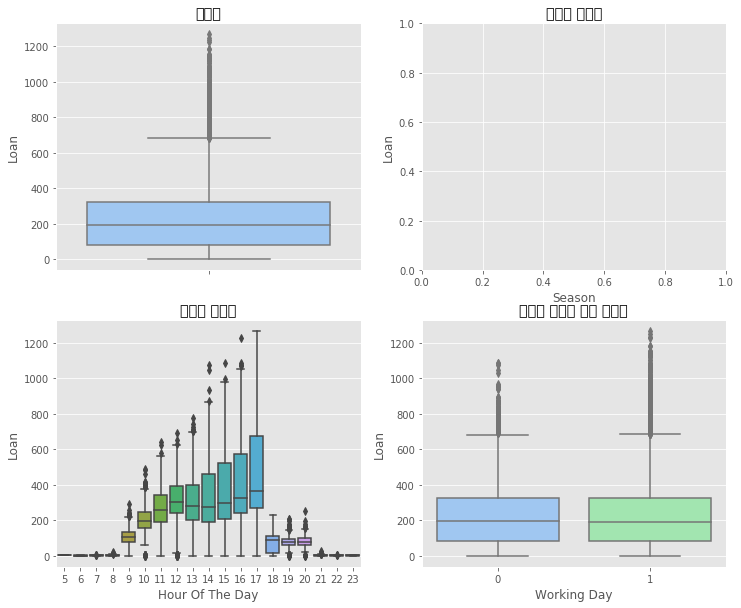

In [20]:

fig, axes = plt.subplots(nrows=2,ncols=2)
fig.set_size_inches(12, 10)
sns.boxplot(data=series,y="loan",orient="v",ax=axes[0][0])
#sns.boxplot(data=series,y="loan",x="season",orient="v",ax=axes[0][1])
sns.boxplot(data=series,y="loan",x="hour",orient="v",ax=axes[1][0])
sns.boxplot(data=series,y="loan",x="workingday",orient="v",ax=axes[1][1])

axes[0][0].set(ylabel='Loan',title="대여량")
axes[0][1].set(xlabel='Season', ylabel='Loan',title="계절별 대여량")
axes[1][0].set(xlabel='Hour Of The Day', ylabel='Loan',title="시간별 대여량")
axes[1][1].set(xlabel='Working Day', ylabel='Loan',title="근무일 여부에 따른 대여량")

In [0]:
series.isnull().sum()

In [21]:
series["dayofweek"] = series["date"].dt.dayofweek
series.shape

(10942, 15)

In [22]:
#근무일만
series["dayofweek"].value_counts()

3    1777
4    1751
2    1728
1    1698
6    1343
5    1337
0    1308
Name: dayofweek, dtype: int64

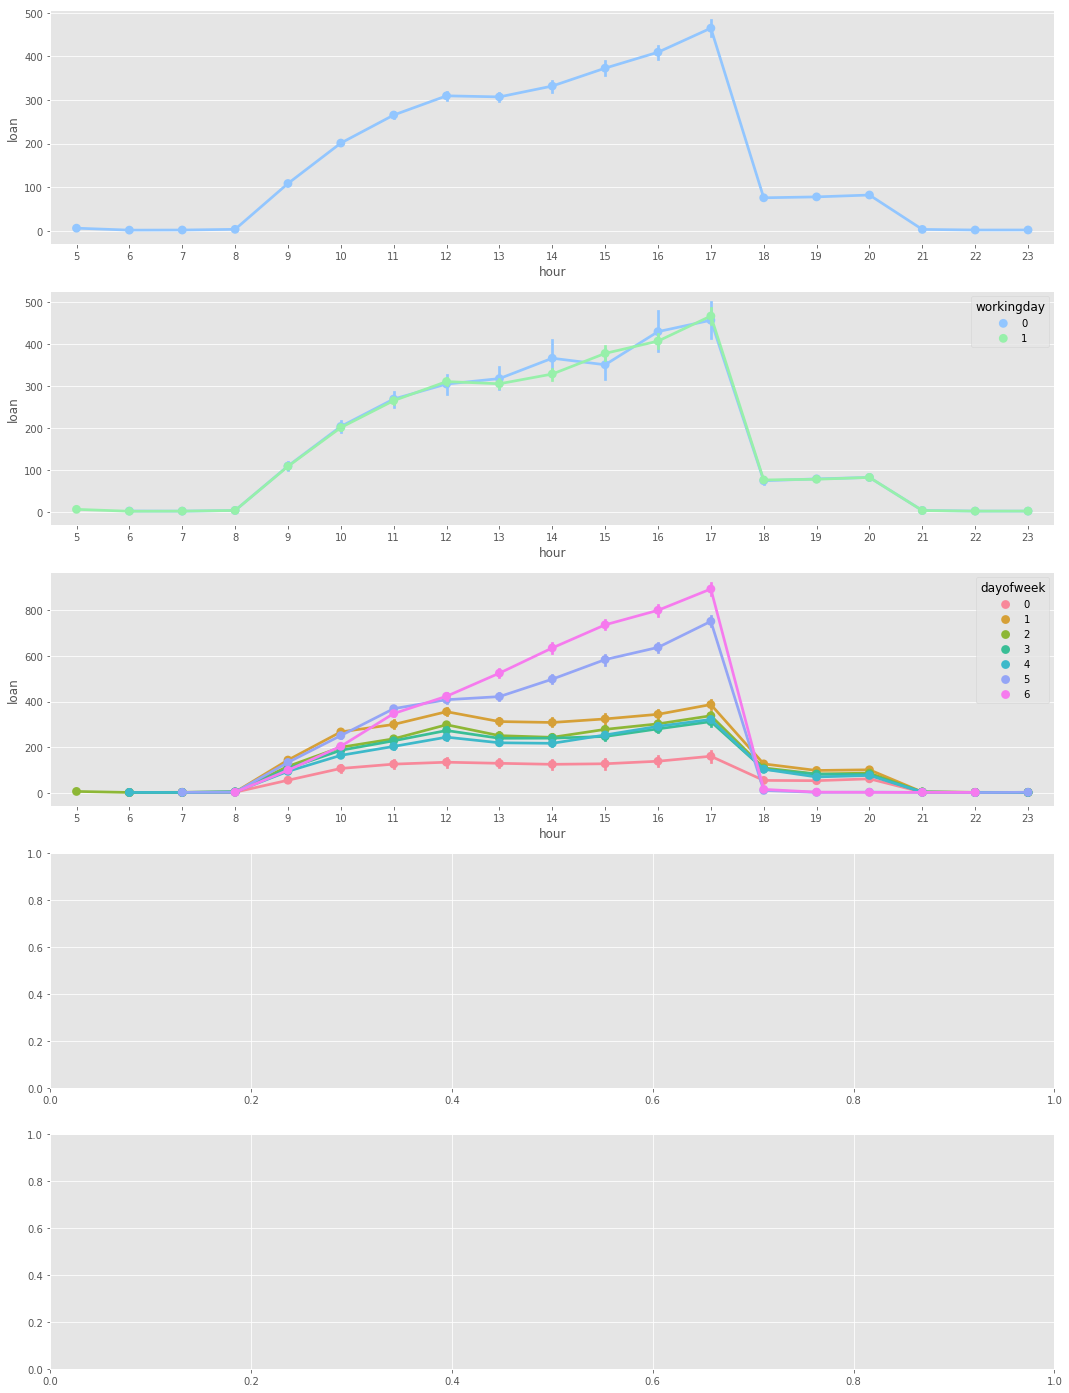

In [23]:
fig,(ax1,ax2,ax3,ax4,ax5)= plt.subplots(nrows=5)
fig.set_size_inches(18,25)

sns.pointplot(data=series, x="hour", y="loan", ax=ax1)

sns.pointplot(data=series, x="hour", y="loan", hue="workingday", ax=ax2)

sns.pointplot(data=series, x="hour", y="loan", hue="dayofweek", ax=ax3)

#sns.pointplot(data=series, x="hour", y="loan", hue="", ax=ax4)

#sns.pointplot(data=series, x="hour", y="loan", hue="", ax=ax5)

In [24]:
###상관관계 분석
corrMatt = series[["c", "mm", "h", "loan"]]
corrMatt = corrMatt.corr()
print(corrMatt)

mask = np.array(corrMatt)
mask[np.tril_indices_from(mask)] = False

             c        mm         h      loan
c     1.000000  0.036733 -0.010085  0.116586
mm    0.036733  1.000000  0.181201 -0.013556
h    -0.010085  0.181201  1.000000 -0.324939
loan  0.116586 -0.013556 -0.324939  1.000000


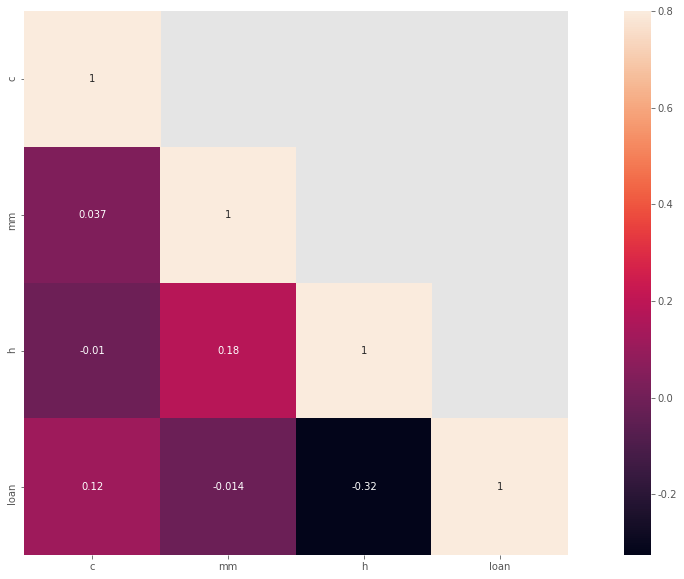

In [25]:
fig, ax = plt.subplots()
fig.set_size_inches(20,10)
sns.heatmap(corrMatt, mask=mask,vmax=.8, square=True,annot=True)



*   **습도가 상관관계가 있다.**




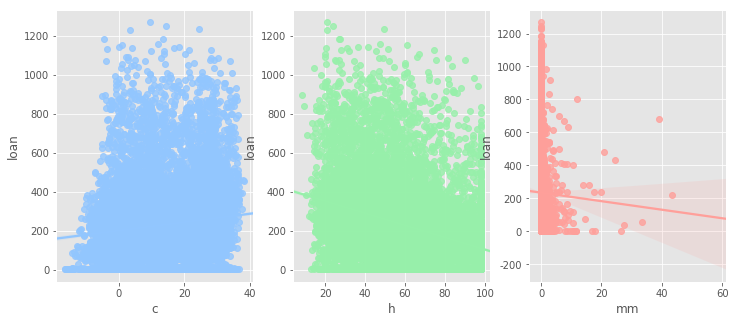

In [26]:
fig,(ax1,ax2,ax3) = plt.subplots(ncols=3)
fig.set_size_inches(12, 5)
sns.regplot(x="c", y="loan", data=series,ax=ax1)
sns.regplot(x="h", y="loan", data=series,ax=ax2)
sns.regplot(x="mm", y="loan", data=series,ax=ax3)

In [27]:
# trainWithoutOutliers
seriesWithoutOutliers = series[np.abs(series["loan"] - series["loan"].mean()) <= (3*series["loan"].std())]

print(series.shape)
print(seriesWithoutOutliers.shape)

(10942, 15)
(10760, 15)


In [30]:
def concatenate_year_month(datetime):
    return "{0}-{1}".format(datetime.year, datetime.month)

series["year_month"] = series["date"].apply(concatenate_year_month)

print(series.shape)
series[["date", "year_month"]].head()

(10942, 16)


,date,year_month
0,2017-01-01 09:00:00,2017-1
1,2017-01-01 10:00:00,2017-1
2,2017-01-01 11:00:00,2017-1
3,2017-01-01 12:00:00,2017-1
4,2017-01-01 13:00:00,2017-1


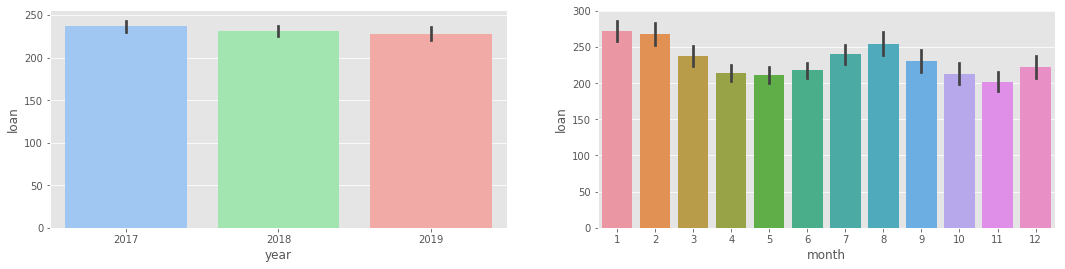

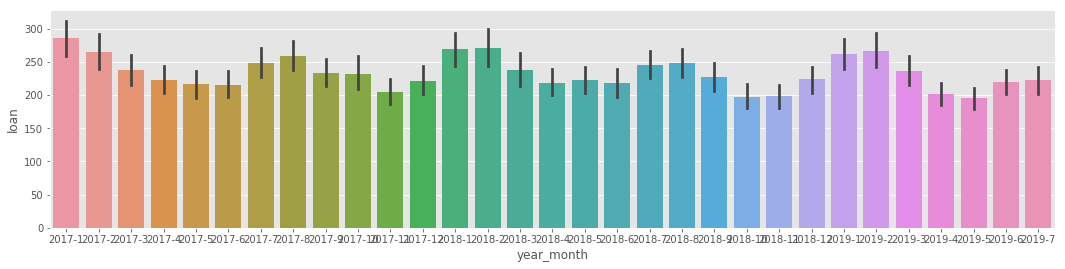

In [31]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2)
fig.set_size_inches(18, 4)

sns.barplot(data=series, x="year", y="loan", ax=ax1)
sns.barplot(data=series, x="month", y="loan", ax=ax2)

fig, ax3 = plt.subplots(nrows=1, ncols=1)
fig.set_size_inches(18, 4)

sns.barplot(data=series, x="year_month", y="loan", ax=ax3)

((array([-3.82867765, -3.60452717, -3.48151329, ...,  3.48151329,
          3.60452717,  3.82867765]),
  array([0.69314718, 0.69314718, 0.69314718, ..., 6.75343792, 6.75343792,
         6.75343792])),
 (1.4689422061327584, 4.697534184329208, 0.9003239600735751))

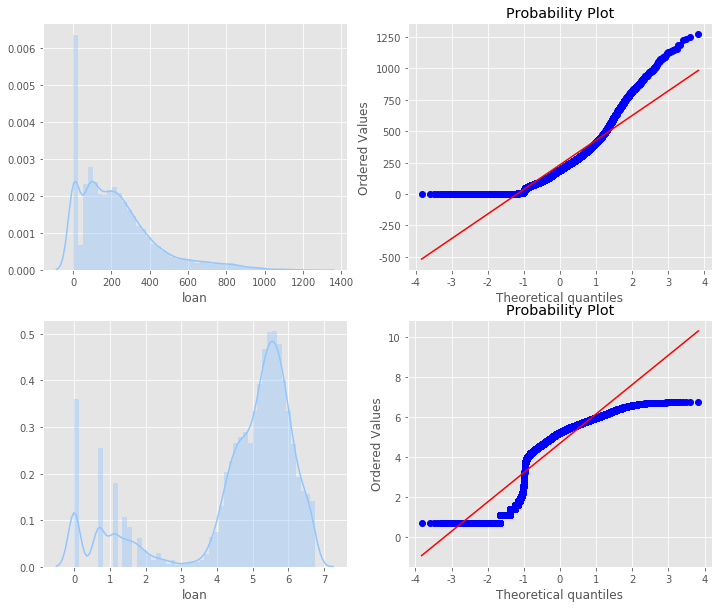

In [28]:
# count값의 데이터 분포도를 파악

figure, axes = plt.subplots(ncols=2, nrows=2)
figure.set_size_inches(12, 10)

sns.distplot(series["loan"], ax=axes[0][0])
stats.probplot(series["loan"], dist='norm', fit=True, plot=axes[0][1])
sns.distplot(np.log(seriesWithoutOutliers["loan"]), ax=axes[1][0])
stats.probplot(np.log1p(seriesWithoutOutliers["loan"]), dist='norm', fit=True, plot=axes[1][1])

In [0]:
import missingno as msno
#null인 데이터가 있는지 시각화
msno.matrix(series, figsize=(12,5))

In [0]:
s2 = pd.DataFrame(columns = ['ATS'])
    
for i in series.ATS :
  if(i >= 100):
   s2 = s2.append({'ATS' : i}, ignore_index = True)
s2

In [0]:
series = pd.Series(data = s2.ATS);series

In [0]:
series =series.astype(int)

In [0]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(series)
plot_pacf(series)
plt.show()

In [0]:
import matplotlib.pyplot as plt
import pandas as pd
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

diff_1=series.diff(periods=1).iloc[1:]
diff_1.plot()
plot_acf(diff_1)
plot_pacf(diff_1)
plt.show()

In [0]:
diff_1

In [0]:
from statsmodels.tsa.arima_model import ARIMA

model = ARIMA(series, order=(0,1,1))
model_fit = model.fit(trend='c',full_output=True, disp=1)
print(model_fit.summary())

In [0]:
from statsmodels.tsa.arima_model import ARIMA

model = ARIMA(series, order=(0,1,1))
model_fit = model.fit(trend='c',full_output=True, disp=1)
print(model_fit.summary())

In [0]:
model_fit.plot_predict()

In [0]:
fore = model_fit.forecast(steps=6)
print(fore)